In [91]:
import numpy as np
import pandas as pd


In [92]:
df = pd.read_csv("/content/diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [93]:
df.corr()['Outcome'] #Compute pairwise correlation of columns, excluding NA/null values.

Pregnancies                 0.221898
Glucose                     0.466581
BloodPressure               0.065068
SkinThickness               0.074752
Insulin                     0.130548
BMI                         0.292695
DiabetesPedigreeFunction    0.173844
Age                         0.238356
Outcome                     1.000000
Name: Outcome, dtype: float64

In [94]:
X = df.iloc[:,:-1].values
y = df.iloc[:,-1:].values

X.shape, y.shape

((768, 8), (768, 1))

In [95]:
X

array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]])

In [96]:
y[:10]

array([[1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1]])

##Need for Standardization
Before getting into Standardization, let us first understand the concept of Scaling.

Scaling of Features is an essential step in modeling the algorithms with the datasets. The data that is usually used for the purpose of modeling is derived through various means such as:

Surveys

Research

Scraping, etc.

So, the data obtained contains features of various dimensions and scales altogether. Different scales of the data features affect the modeling of a dataset adversely.

It leads to a **biased outcome** of predictions in terms of **misclassification error and accuracy rates.**

#Thus, it is necessary to Scale the data prior to modeling.

This is when standardization comes into picture.

Standardization is a scaling technique wherein it makes the data scale-free by converting the statistical distribution of the data into the below format:

mean - 0 (zero)
standard deviation - 1


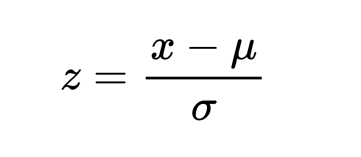

In [97]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

#Why we use fit_transform() on training data but transform() on the test data?

####Data standardization is the process of rescaling the attributes so that they have mean as 0 and variance as 1.

####The ultimate goal to perform standardization is to bring down all the features to a common scale without distorting the differences in the range of the values.

####In sklearn.preprocessing.StandardScaler(), centering and scaling happens independently on each feature.

The magical formula which performs standardization:

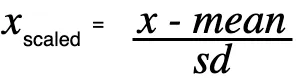

##Let’s now deep dive into the concept.

**fit_transform()**

fit_transform() is used on the training data so that we can scale the training data and also learn the scaling parameters of that data. Here, the model built by us will learn the mean and variance of the features of the training set. These learned parameters are then used to scale our test data.

So what actually is happening here! 🤔

The fit method is calculating the mean and variance of each of the features present in our data. The transform method is transforming all the features using the respective mean and variance.

Now, we want scaling to be applied to our test data too and at the same time do not want to be biased with our model. We want our test data to be a completely new and a surprise set for our model. The transform method helps us in this case.

Related Article — Want to know about Multicollinearity? https://towardsdatascience.com/multicollinearity-why-is-it-bad-5335030651bf

**transform()**

Using the transform method we can use the same mean and variance as it is calculated from our training data to transform our test data. Thus, the parameters learned by our model using the training data will help us to transform our test data.

In [98]:
X = scaler.fit_transform(X)
X, X.shape

(array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.20401277,
          0.46849198,  1.4259954 ],
        [-0.84488505, -1.12339636, -0.16054575, ..., -0.68442195,
         -0.36506078, -0.19067191],
        [ 1.23388019,  1.94372388, -0.26394125, ..., -1.10325546,
          0.60439732, -0.10558415],
        ...,
        [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.73518964,
         -0.68519336, -0.27575966],
        [-0.84488505,  0.1597866 , -0.47073225, ..., -0.24020459,
         -0.37110101,  1.17073215],
        [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.20212881,
         -0.47378505, -0.87137393]]),
 (768, 8))

In [99]:
from sklearn.model_selection import   train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [100]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Dropout


In [101]:
model = Sequential()
model.add(Dense(32,activation='relu',input_dim=8))
model.add(Dense(1,activation="sigmoid"))

model.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_train,y_train,batch_size=32,epochs=100, validation_data=(X_test,y_test))

Epoch 1/100
20/20 [==============================] - 1s 15ms/step - loss: 0.7102 - accuracy: 0.6466 - val_loss: 0.6702 - val_accuracy: 0.6494
Epoch 2/100
20/20 [==============================] - 0s 5ms/step - loss: 0.6577 - accuracy: 0.6564 - val_loss: 0.6250 - val_accuracy: 0.6558
Epoch 3/100
20/20 [==============================] - 0s 6ms/step - loss: 0.6160 - accuracy: 0.6775 - val_loss: 0.5912 - val_accuracy: 0.6688
Epoch 4/100
20/20 [==============================] - 0s 5ms/step - loss: 0.5844 - accuracy: 0.6954 - val_loss: 0.5623 - val_accuracy: 0.7013
Epoch 5/100
20/20 [==============================] - 0s 4ms/step - loss: 0.5606 - accuracy: 0.7036 - val_loss: 0.5400 - val_accuracy: 0.7338
Epoch 6/100
20/20 [==============================] - 0s 5ms/step - loss: 0.5399 - accuracy: 0.7101 - val_loss: 0.5230 - val_accuracy: 0.7792
Epoch 7/100
20/20 [==============================] - 0s 5ms/step - loss: 0.5232 - accuracy: 0.7264 - val_loss: 0.5107 - val_accuracy: 0.7922
Epoch 8/100


In [102]:
import matplotlib.pyplot as plt

In [103]:
# Plot the loss curves
def accuracy(history):
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'val'], loc='upper left')
  plt.show()


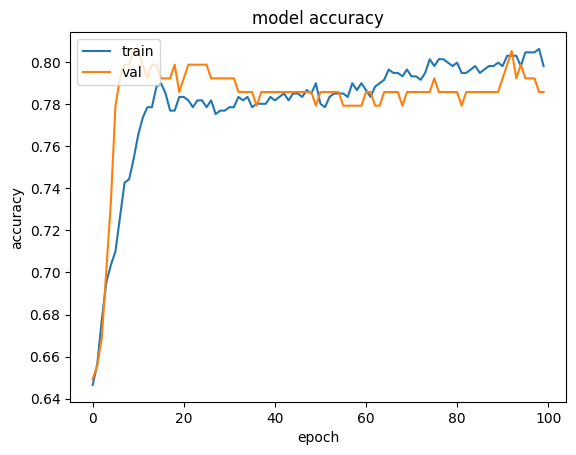

In [104]:
accuracy(history)

In [105]:
def loss(history):
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'val'], loc='upper left')
  plt.show()


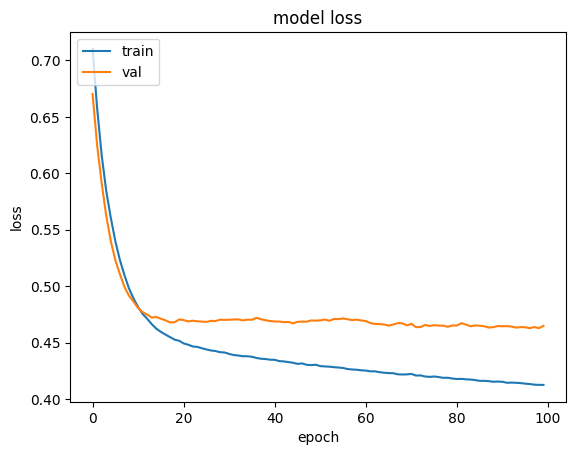

In [106]:
loss(history)


In [107]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

def plot_curve(history):
  # Create figure with secondary y-axis
  fig = make_subplots(specs=[[{"secondary_y": True}]])

  # Add traces
  fig.add_trace(
      go.Scatter( y=history.history['val_loss'], name="val_loss"),
      secondary_y=False,
  )

  fig.add_trace(
      go.Scatter( y=history.history['loss'], name="loss"),
      secondary_y=False,
  )

  fig.add_trace(
      go.Scatter( y=history.history['val_accuracy'], name="val accuracy"),
      secondary_y=True,
  )

  fig.add_trace(
      go.Scatter( y=history.history['accuracy'], name="accuracy"),
      secondary_y=True,
  )

  # Add figure title
  fig.update_layout(
      title_text="Loss/Accuracy of CNN Model"
  )

  # Set x-axis title
  fig.update_xaxes(title_text="Epoch")

  # Set y-axes titles
  fig.update_yaxes(title_text="primary Loss", secondary_y=False)
  fig.update_yaxes(title_text="secondary Accuracy", secondary_y=True)

  fig.show()

In [108]:
plot_curve(history)


In [109]:
!pip install -U keras-tuner

In [110]:
import keras_tuner as kt  #import kerastuner as kt       (but deprecetaed)

###Tune the model architecture
The first thing we need to do is writing a function, which returns a compiled Keras model. It takes an argument hp for defining the hyperparameters while building the model.

Define the search space
In the following code example, we define a Keras model with two Dense layers. We want to tune the number of units in the first Dense layer. We just define an integer hyperparameter with hp.Int('units', min_value=32, max_value=512, step=32), whose range is from 32 to 512 inclusive. When sampling from it, the minimum step for walking through the interval is 32.


from tensorflow import keras
from tensorflow.keras import layers


def build_model(hp):
    model = keras.Sequential()
    model.add(layers.Flatten())
    model.add(
        layers.Dense(
            # Define the hyperparameter.
            units=hp.Int("units", min_value=32, max_value=512, step=32),
            activation="relu",
        )
    )
    model.add(layers.Dense(10, activation="softmax"))
    model.compile(
        optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"],
    )
    return model

```
# This is formatted as code
```



#how to know number of units in layer and optimizer?

In [111]:
def build_model(hp):
    model = Sequential()
    model.add(Dense(32,activation='relu',input_dim=8))

    units = hp.Int("units", min_value=8, max_value=512, step=8)
    model.add(
        Dense(
            # Define the hyperparameter.
            units=units,
            activation="relu",
        )
    )
    model.add(Dense(1, activation="sigmoid"))

    optimizer = hp.Choice('optimizer', values=['adam','sgd','rmsprop','adadelta','adamw','adagrad','adamax','adafactor','nadam','ftrl'])
    model.compile(
        optimizer=optimizer, loss="binary_crossentropy", metrics=["accuracy"],
    )
    return model

In [112]:
tuner = kt.RandomSearch(hypermodel=build_model, objective='val_accuracy',max_trials=5)

Reloading Tuner from ./untitled_project/tuner0.json


In [113]:
tuner.search(X_train, y_train, epochs=5, validation_data=(X_test, y_test))

In [114]:
tuner.get_best_hyperparameters()[0].values

{'units': 408, 'optimizer': 'adam'}

In [115]:
model = tuner.get_best_models(num_models=1)[0]


In [116]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                288       
                                                                 
 dense_1 (Dense)             (None, 408)               13464     
                                                                 
 dense_2 (Dense)             (None, 1)                 409       
                                                                 
Total params: 14161 (55.32 KB)
Trainable params: 14161 (55.32 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [117]:
!pip install keras-tuner --upgrade

In [118]:
history = model.fit(X_train,y_train,batch_size=32, initial_epoch=6,epochs=100, validation_data=(X_test,y_test))

Epoch 7/100
20/20 [==============================] - 2s 20ms/step - loss: 0.4576 - accuracy: 0.7704 - val_loss: 0.4559 - val_accuracy: 0.8052
Epoch 8/100
20/20 [==============================] - 0s 7ms/step - loss: 0.4491 - accuracy: 0.7785 - val_loss: 0.4538 - val_accuracy: 0.8052
Epoch 9/100
20/20 [==============================] - 0s 6ms/step - loss: 0.4536 - accuracy: 0.7866 - val_loss: 0.4564 - val_accuracy: 0.7987
Epoch 10/100
20/20 [==============================] - 0s 7ms/step - loss: 0.4379 - accuracy: 0.7834 - val_loss: 0.4510 - val_accuracy: 0.8182
Epoch 11/100
20/20 [==============================] - 0s 6ms/step - loss: 0.4308 - accuracy: 0.7866 - val_loss: 0.4554 - val_accuracy: 0.8312
Epoch 12/100
20/20 [==============================] - 0s 7ms/step - loss: 0.4265 - accuracy: 0.7899 - val_loss: 0.4511 - val_accuracy: 0.8312
Epoch 13/100
20/20 [==============================] - 0s 6ms/step - loss: 0.4246 - accuracy: 0.7964 - val_loss: 0.4520 - val_accuracy: 0.8182
Epoch 14

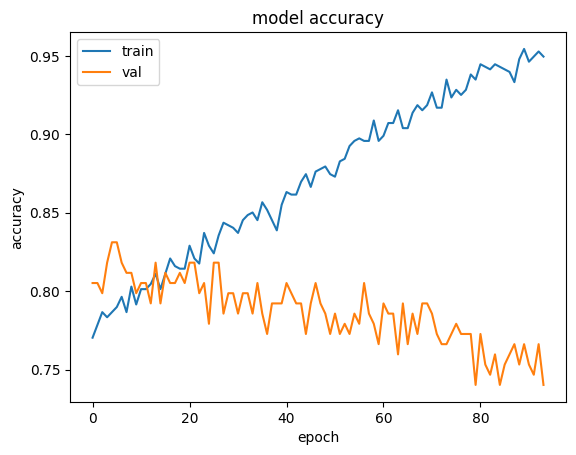

In [119]:
accuracy(history)

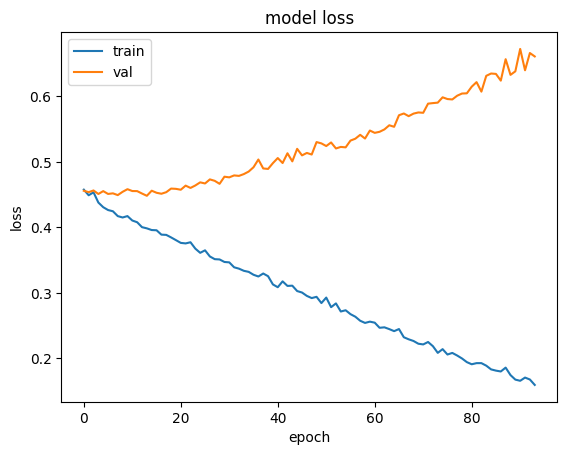

In [120]:
loss(history)

In [121]:
plot_curve(history)

#How many units(neurons) on a layer?

In [122]:
def build_model(hp):
    model = Sequential()
    units = hp.Int("units", min_value=8, max_value=512, step=8)

    model.add(Dense(units=units,activation='relu',input_dim=8))


    model.add(Dense(1, activation="sigmoid"))

    optimizer = hp.Choice('optimizer', values=['adam','sgd','rmsprop','adadelta','adamw','adagrad','adamax','adafactor','nadam','ftrl'])
    model.compile(
        optimizer=optimizer, loss="binary_crossentropy", metrics=["accuracy"],
    )
    return model

In [123]:
tuner = kt.RandomSearch(hypermodel=build_model, objective='val_accuracy',max_trials=5,directory="mydir",project_name="samim1")

Reloading Tuner from mydir/samim1/tuner0.json


In [124]:
tuner.search(X_train, y_train, epochs=5, validation_data=(X_test, y_test))

In [125]:
tuner.get_best_hyperparameters()[0].values

{'units': 104, 'optimizer': 'rmsprop'}

In [126]:
model = tuner.get_best_models(num_models=1)[0]


In [127]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 104)               936       
                                                                 
 dense_1 (Dense)             (None, 1)                 105       
                                                                 
Total params: 1041 (4.07 KB)
Trainable params: 1041 (4.07 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [128]:
history = model.fit(X_train,y_train,batch_size=32, initial_epoch=6,epochs=100, validation_data=(X_test,y_test))

Epoch 7/100
20/20 [==============================] - 1s 14ms/step - loss: 0.5407 - accuracy: 0.7687 - val_loss: 0.5142 - val_accuracy: 0.7857
Epoch 8/100
20/20 [==============================] - 0s 5ms/step - loss: 0.5089 - accuracy: 0.7671 - val_loss: 0.4925 - val_accuracy: 0.7727
Epoch 9/100
20/20 [==============================] - 0s 4ms/step - loss: 0.4890 - accuracy: 0.7671 - val_loss: 0.4839 - val_accuracy: 0.7727
Epoch 10/100
20/20 [==============================] - 0s 4ms/step - loss: 0.4763 - accuracy: 0.7850 - val_loss: 0.4794 - val_accuracy: 0.7792
Epoch 11/100
20/20 [==============================] - 0s 4ms/step - loss: 0.4686 - accuracy: 0.7834 - val_loss: 0.4743 - val_accuracy: 0.7792
Epoch 12/100
20/20 [==============================] - 0s 4ms/step - loss: 0.4626 - accuracy: 0.7785 - val_loss: 0.4747 - val_accuracy: 0.7922
Epoch 13/100
20/20 [==============================] - 0s 4ms/step - loss: 0.4572 - accuracy: 0.7818 - val_loss: 0.4727 - val_accuracy: 0.7662
Epoch 14

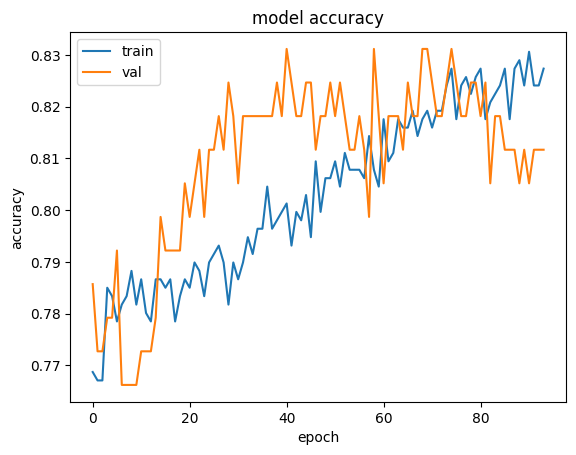

In [129]:
accuracy(history)

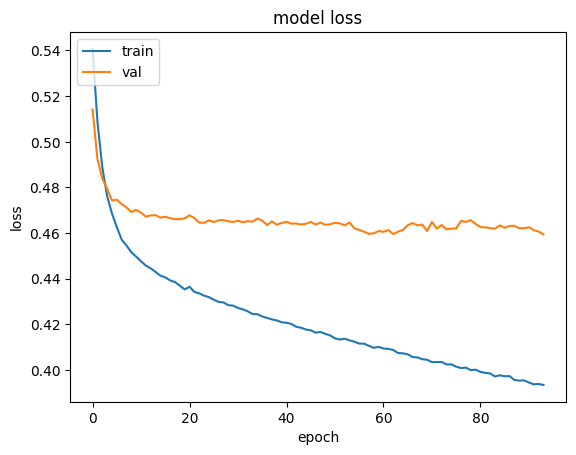

In [130]:
loss(history)

In [131]:
plot_curve(history)

#How many layers needed?

In [132]:
def build_model(hp):
    model = Sequential()

    model.add(Dense(104,activation='relu',input_dim=8))
    for i in range(hp.Int('num_layers',min_value=1,max_value=10)):
      model.add(Dense(104,activation="relu"))


    model.add(Dense(1, activation="sigmoid"))

    model.compile(
        optimizer="rmsprop", loss="binary_crossentropy", metrics=["accuracy"],
    )
    return model

In [133]:
tuner = kt.RandomSearch(hypermodel=build_model, objective='val_accuracy',max_trials=5,directory="mydir",project_name="samim3")

Reloading Tuner from mydir/samim3/tuner0.json


In [134]:
tuner.search(X_train, y_train, epochs=5, validation_data=(X_test, y_test))

In [135]:
tuner.get_best_hyperparameters()[0].values

{'num_layers': 4}

In [136]:
model = tuner.get_best_models(num_models=1)[0]

In [137]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 104)               936       
                                                                 
 dense_1 (Dense)             (None, 104)               10920     
                                                                 
 dense_2 (Dense)             (None, 104)               10920     
                                                                 
 dense_3 (Dense)             (None, 104)               10920     
                                                                 
 dense_4 (Dense)             (None, 104)               10920     
                                                                 
 dense_5 (Dense)             (None, 1)                 105       
                                                                 
Total params: 44721 (174.69 KB)
Trainable params: 44721 

In [138]:
history = model.fit(X_train,y_train,batch_size=32, initial_epoch=6,epochs=100, validation_data=(X_test,y_test))

Epoch 7/100
20/20 [==============================] - 1s 15ms/step - loss: 0.4357 - accuracy: 0.7915 - val_loss: 0.4697 - val_accuracy: 0.7987
Epoch 8/100
20/20 [==============================] - 0s 5ms/step - loss: 0.4302 - accuracy: 0.7948 - val_loss: 0.5217 - val_accuracy: 0.7338
Epoch 9/100
20/20 [==============================] - 0s 6ms/step - loss: 0.4224 - accuracy: 0.8013 - val_loss: 0.4888 - val_accuracy: 0.7857
Epoch 10/100
20/20 [==============================] - 0s 5ms/step - loss: 0.4013 - accuracy: 0.8094 - val_loss: 0.4909 - val_accuracy: 0.7662
Epoch 11/100
20/20 [==============================] - 0s 6ms/step - loss: 0.3948 - accuracy: 0.8208 - val_loss: 0.5129 - val_accuracy: 0.8117
Epoch 12/100
20/20 [==============================] - 0s 6ms/step - loss: 0.3882 - accuracy: 0.8160 - val_loss: 0.4887 - val_accuracy: 0.7922
Epoch 13/100
20/20 [==============================] - 0s 6ms/step - loss: 0.3650 - accuracy: 0.8306 - val_loss: 0.4921 - val_accuracy: 0.7922
Epoch 14

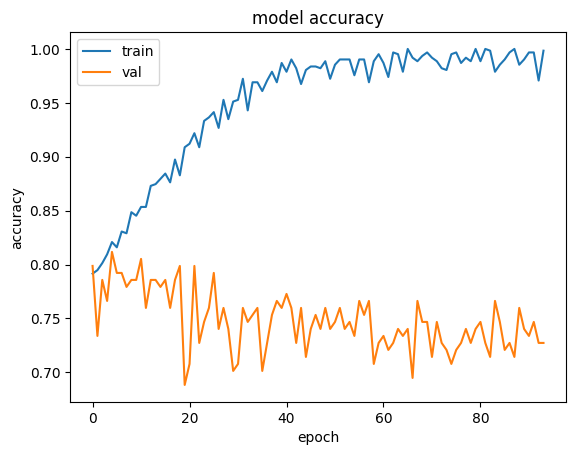

In [139]:
accuracy(history)

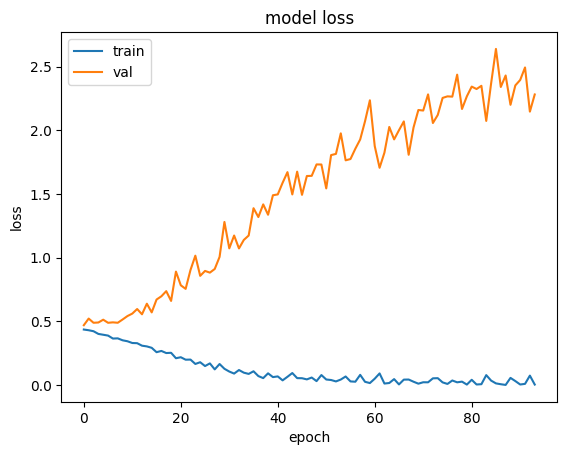

In [140]:
loss(history)

In [141]:
plot_curve(history)

In [142]:
def build_model(hp):
    model = Sequential()
    counter = 0
    for i in range(hp.Int('num_layers',min_value=1,max_value=10)):
      if counter == 0:
        model.add(Dense(hp.Int('units' + str(i), min_value=8, max_value=128, step=8),activation=hp.Choice('activation' + str(i), values=['relu','tanh','sigmoid']),input_dim=8))
      else:
        model.add(Dense(hp.Int('units' + str(i), min_value=8, max_value=128, step=8),activation=hp.Choice('activation'+ str(i), values=['relu','tanh','sigmoid']),input_dim=8))
    counter+=1



    model.add(Dense(1, activation="sigmoid"))

    optimizer = hp.Choice('optimizer', values=['adam','sgd','rmsprop','adadelta','adamw','adagrad','adamax','adafactor','nadam','ftrl'])
    model.compile(
        optimizer=optimizer, loss="binary_crossentropy", metrics=["accuracy"],
    )
    return model

In [143]:
tuner = kt.RandomSearch(hypermodel=build_model, objective='val_accuracy',max_trials=5,directory="mydir",project_name="samim10")

In [144]:
tuner.search(X_train, y_train, epochs=5, validation_data=(X_test, y_test))

Trial 5 Complete [00h 00m 03s]
val_accuracy: 0.798701286315918

Best val_accuracy So Far: 0.798701286315918
Total elapsed time: 00h 00m 20s


In [145]:
tuner.get_best_hyperparameters()[0].values

{'num_layers': 7,
 'units0': 56,
 'activation0': 'tanh',
 'optimizer': 'rmsprop',
 'units1': 32,
 'activation1': 'relu',
 'units2': 72,
 'activation2': 'relu',
 'units3': 80,
 'activation3': 'tanh',
 'units4': 128,
 'activation4': 'sigmoid',
 'units5': 96,
 'activation5': 'tanh',
 'units6': 96,
 'activation6': 'sigmoid',
 'units7': 32,
 'activation7': 'sigmoid',
 'units8': 8,
 'activation8': 'sigmoid',
 'units9': 112,
 'activation9': 'relu'}

In [146]:
model = tuner.get_best_models(num_models=1)[0]

In [147]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 56)                504       
                                                                 
 dense_1 (Dense)             (None, 32)                1824      
                                                                 
 dense_2 (Dense)             (None, 72)                2376      
                                                                 
 dense_3 (Dense)             (None, 80)                5840      
                                                                 
 dense_4 (Dense)             (None, 128)               10368     
                                                                 
 dense_5 (Dense)             (None, 96)                12384     
                                                                 
 dense_6 (Dense)             (None, 96)                9

In [148]:
history = model.fit(X_train,y_train,batch_size=32, initial_epoch=6,epochs=100, validation_data=(X_test,y_test))

Epoch 7/100
20/20 [==============================] - 2s 18ms/step - loss: 0.4761 - accuracy: 0.7590 - val_loss: 0.6271 - val_accuracy: 0.6818
Epoch 8/100
20/20 [==============================] - 0s 6ms/step - loss: 0.4666 - accuracy: 0.7785 - val_loss: 0.4748 - val_accuracy: 0.7857
Epoch 9/100
20/20 [==============================] - 0s 5ms/step - loss: 0.4616 - accuracy: 0.7687 - val_loss: 0.5060 - val_accuracy: 0.7792
Epoch 10/100
20/20 [==============================] - 0s 6ms/step - loss: 0.4606 - accuracy: 0.7736 - val_loss: 0.4511 - val_accuracy: 0.8312
Epoch 11/100
20/20 [==============================] - 0s 6ms/step - loss: 0.4521 - accuracy: 0.7850 - val_loss: 0.4603 - val_accuracy: 0.7922
Epoch 12/100
20/20 [==============================] - 0s 5ms/step - loss: 0.4567 - accuracy: 0.7720 - val_loss: 0.4634 - val_accuracy: 0.7857
Epoch 13/100
20/20 [==============================] - 0s 5ms/step - loss: 0.4494 - accuracy: 0.7915 - val_loss: 0.4464 - val_accuracy: 0.7922
Epoch 14

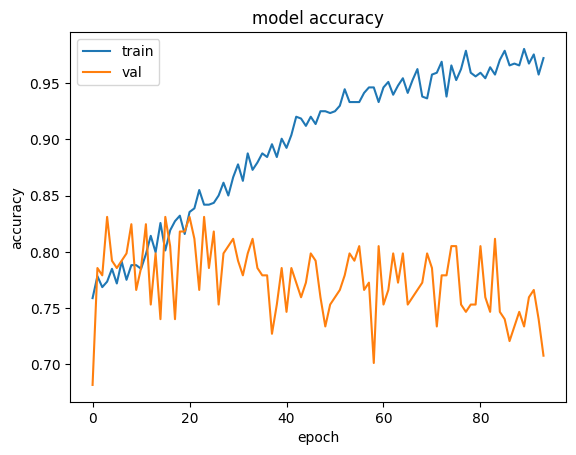

In [149]:
accuracy(history)

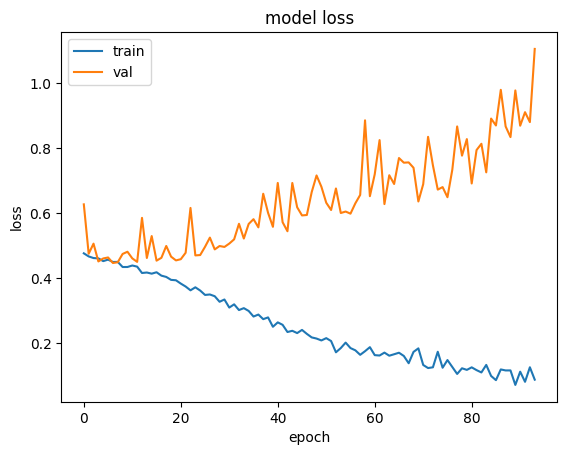

In [150]:
loss(history)

In [151]:
plot_curve(history)

In [153]:
def build_model(hp):
    model = Sequential()
    counter = 0
    for i in range(hp.Int('num_layers',min_value=1,max_value=10)):
      if counter == 0:
        model.add(Dense(hp.Int('units' + str(i), min_value=8, max_value=128, step=8),activation=hp.Choice('activation' + str(i), values=['relu','tanh','sigmoid']),input_dim=8))
        model.add(Dropout(hp.Choice('dropout' + str(i), values=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])))
      else:
        model.add(Dense(hp.Int('units' + str(i), min_value=8, max_value=128, step=8),activation=hp.Choice('activation'+ str(i), values=['relu','tanh','sigmoid']),input_dim=8))
        model.add(Dropout(hp.Choice('dropout' + str(i), values=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])))
    counter+=1



    model.add(Dense(1, activation="sigmoid"))

    optimizer = hp.Choice('optimizer', values=['adam','sgd','rmsprop','adadelta','adamw','adagrad','adamax','adafactor','nadam','ftrl'])
    model.compile(
        optimizer=optimizer, loss="binary_crossentropy", metrics=["accuracy"],
    )
    return model

In [154]:
tuner = kt.RandomSearch(hypermodel=build_model, objective='val_accuracy',max_trials=5,directory="mydir",project_name="samim11")

In [155]:
tuner.search(X_train, y_train, epochs=5, validation_data=(X_test, y_test))

Trial 5 Complete [00h 00m 03s]
val_accuracy: 0.350649356842041

Best val_accuracy So Far: 0.6428571343421936
Total elapsed time: 00h 00m 15s


In [156]:
tuner.get_best_hyperparameters()[0].values

{'num_layers': 9,
 'units0': 80,
 'activation0': 'tanh',
 'dropout0': 0.6,
 'optimizer': 'rmsprop',
 'units1': 8,
 'activation1': 'relu',
 'dropout1': 0.1,
 'units2': 8,
 'activation2': 'relu',
 'dropout2': 0.1,
 'units3': 8,
 'activation3': 'relu',
 'dropout3': 0.1,
 'units4': 8,
 'activation4': 'relu',
 'dropout4': 0.1,
 'units5': 8,
 'activation5': 'relu',
 'dropout5': 0.1,
 'units6': 8,
 'activation6': 'relu',
 'dropout6': 0.1,
 'units7': 8,
 'activation7': 'relu',
 'dropout7': 0.1,
 'units8': 8,
 'activation8': 'relu',
 'dropout8': 0.1}

In [157]:
model = tuner.get_best_models(num_models=1)[0]

In [158]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 80)                720       
                                                                 
 dropout (Dropout)           (None, 80)                0         
                                                                 
 dense_1 (Dense)             (None, 8)                 648       
                                                                 
 dropout_1 (Dropout)         (None, 8)                 0         
                                                                 
 dense_2 (Dense)             (None, 8)                 72        
                                                                 
 dropout_2 (Dropout)         (None, 8)                 0         
                                                                 
 dense_3 (Dense)             (None, 8)                 7

In [163]:
history = model.fit(X_train,y_train,batch_size=32, initial_epoch=6,epochs=200, validation_data=(X_test,y_test))

Epoch 7/200
20/20 [==============================] - 0s 7ms/step - loss: 0.5158 - accuracy: 0.7704 - val_loss: 0.5200 - val_accuracy: 0.7857
Epoch 8/200
20/20 [==============================] - 0s 5ms/step - loss: 0.5117 - accuracy: 0.7671 - val_loss: 0.5179 - val_accuracy: 0.7857
Epoch 9/200
20/20 [==============================] - 0s 5ms/step - loss: 0.5094 - accuracy: 0.7524 - val_loss: 0.5226 - val_accuracy: 0.7727
Epoch 10/200
20/20 [==============================] - 0s 5ms/step - loss: 0.5037 - accuracy: 0.7655 - val_loss: 0.5199 - val_accuracy: 0.7857
Epoch 11/200
20/20 [==============================] - 0s 5ms/step - loss: 0.4942 - accuracy: 0.7524 - val_loss: 0.5182 - val_accuracy: 0.7857
Epoch 12/200
20/20 [==============================] - 0s 5ms/step - loss: 0.5191 - accuracy: 0.7427 - val_loss: 0.5217 - val_accuracy: 0.7792
Epoch 13/200
20/20 [==============================] - 0s 5ms/step - loss: 0.4991 - accuracy: 0.7590 - val_loss: 0.5222 - val_accuracy: 0.7727
Epoch 14/

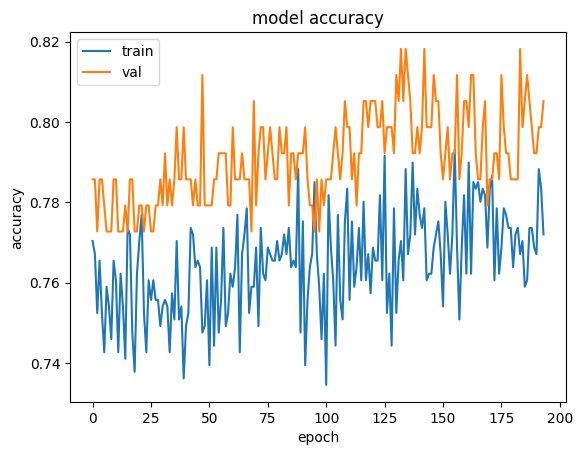

In [164]:
accuracy(history)

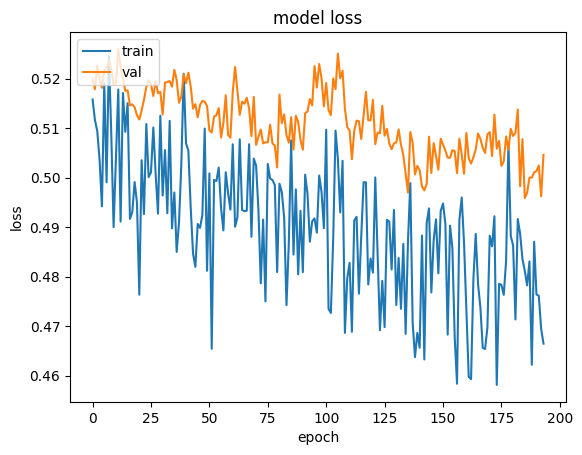

In [165]:
loss(history)

In [166]:
plot_curve(history)